In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization

from data_loading import MinMaxScaler
import tensorflow as tf
import os

In [2]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ['CUDA_VISIBLE_DEVICES'] = "3"
config = tf.compat.v1.ConfigProto() # Another Version: config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [3]:
## Data real loading - energy
data_name = 'energy'
seq_len = 24

if data_name in ['stock', 'energy']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)


print(data_name + ' dataset is ready.')

energy dataset is ready.


In [4]:
# load the generated data -- RGAN's data
tgt_path = "/data/home/stufs1/zuwang/dg21/RGAN/experiments/syn_data/"
filename = "rgan_energy_synth_data_epoch1000.npy"

syn_data = np.load(os.path.join(tgt_path, filename))
syn_data = list(syn_data)

In [5]:
np.array(ori_data).shape, np.array(syn_data).shape

((19711, 24, 28), (391476, 24, 28))

In [6]:
# normalization-again for training.
norm_constant = np.max(syn_data)
ori_data = ori_data / norm_constant
syn_data = syn_data / norm_constant

In [7]:
metric_iteration = 5
# predictive score
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, syn_data)
  predictive_score.append(temp_pred)


print('All the predictive scores:', predictive_score)
print('Predictive avg. score: ' + str(np.round(np.mean(predictive_score), 4)))
print('Predictive std. score: ' + str(np.round(np.std(predictive_score), 4)))





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instr

2021-08-12 01:52:15.317854: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-08-12 01:52:15.358476: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1618] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:d8:00.0
2021-08-12 01:52:15.358853: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.0
2021-08-12 01:52:15.360182: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10.0
2021-08-12 01:52:15.362659: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10.0
2021-08-12 01:52:15.363170: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10.0
2021-08-12 01:52:15.364700: I tensorflow/stream_executor/platfo

2021-08-12 01:52:15.575975: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1159] Device interconnect StreamExecutor with strength 1 edge matrix:
2021-08-12 01:52:15.576004: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1165]      0 
2021-08-12 01:52:15.576009: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1178] 0:   N 
2021-08-12 01:52:15.583999: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1304] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30591 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:d8:00.0, compute capability: 7.0)
2021-08-12 01:52:15.587211: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x55f247b8fb80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2021-08-12 01:52:15.587243: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2021-08-12 01:52:17.139642: I tens

All the predictive scores: [0.2622107072592826, 0.26393847159675193, 0.2629590669384619, 0.26310600231554027, 0.26248499397918124]
Predictive avg. score: 0.2629
Predictive std. score: 0.0006


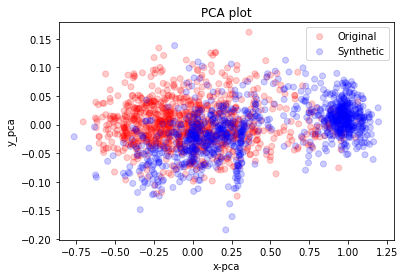

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.000s...
[t-SNE] Computed neighbors for 2000 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.049845
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.343555
[t-SNE] KL divergence after 300 iterations: 1.365898


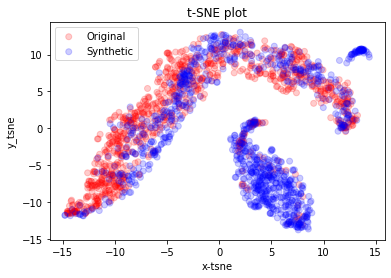

In [8]:
# visualization
visualization(ori_data, syn_data, 'pca')
visualization(ori_data, syn_data, 'tsne')

In [ ]:
# move generated figures

%mv tsne-results-energy-rgan.png ./figures_rgan
%mv pca-results-energy-rgan.png ./figures_rgan